In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
image_path="../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

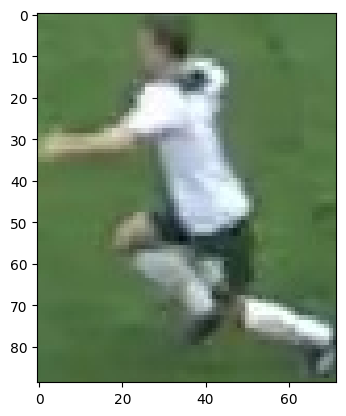

In [3]:
plt.imshow(image)
plt.show()

# take the top half of image


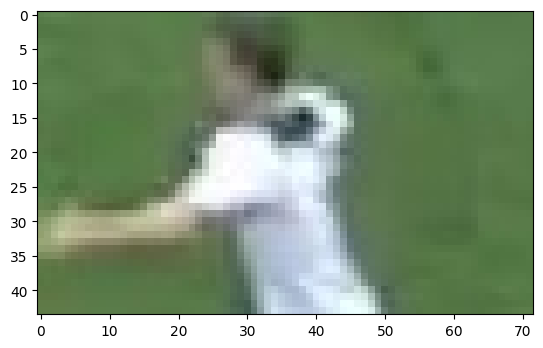

In [4]:
top_half_image=image[0:int(image.shape[0]/2),:]
plt.imshow(top_half_image)
plt.show()

# cluster the image into two cluster

In [5]:
# reshape the image to 2D array

c:\Users\great\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


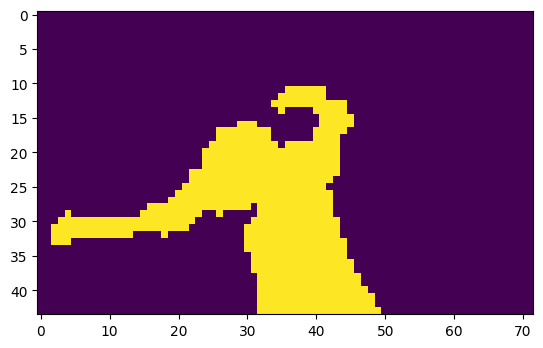

In [9]:
image_2D = top_half_image.reshape((-1,3))
#perform kmeans clustering with 2 clusters
kmeans=KMeans(n_clusters=2, random_state=0).fit(image_2D) 

#get the cluster label

labels=kmeans.labels_

#reshape the labels into the original image shape

clustered_image=labels.reshape(top_half_image.shape[0],top_half_image.shape[1])

#display the clustered image
plt.imshow(clustered_image)
plt.show()


In [10]:
corner_cluster=[clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
non_player_cluster=max(set(corner_cluster),key=corner_cluster.count)
print(non_player_cluster)

0


In [11]:
player_cluster=1-non_player_cluster
print(player_cluster)

1


In [12]:
kmeans.cluster_centers_[player_cluster]

array([199.03658537, 209.27351916, 212.69512195])